In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [3]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [5]:
df.drop(labels = ['Poster_Link' , 'Star1', 'Star2', 'Star3', 'Star4','Released_Year'], inplace=True, axis=1)
df.columns

Index(['Series_Title', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'No_of_Votes', 'Gross'],
      dtype='object')

In [6]:
df.dropna()

,Series_Title,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,PG,157 min,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,30144,"696,690"
991,Kelly's Heroes,GP,144 min,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,45338,"1,378,435"
992,The Jungle Book,U,78 min,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,166409,"141,843,612"
994,A Hard Day's Night,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,40351,"13,780,024"


In [7]:
count_move_for_each_genre =df.Genre.value_counts().reset_index()
count_move_for_each_genre.columns = ['Genre', 'Count']
count_move_for_each_genre

,Genre,Count
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


In [8]:
print("Most popular genre of movies and TV shows is :" )
most_popular_genre= count_move_for_each_genre.iloc[0]['Genre']
most_popular_genre

Most popular genre of movies and TV shows is :


'Drama'

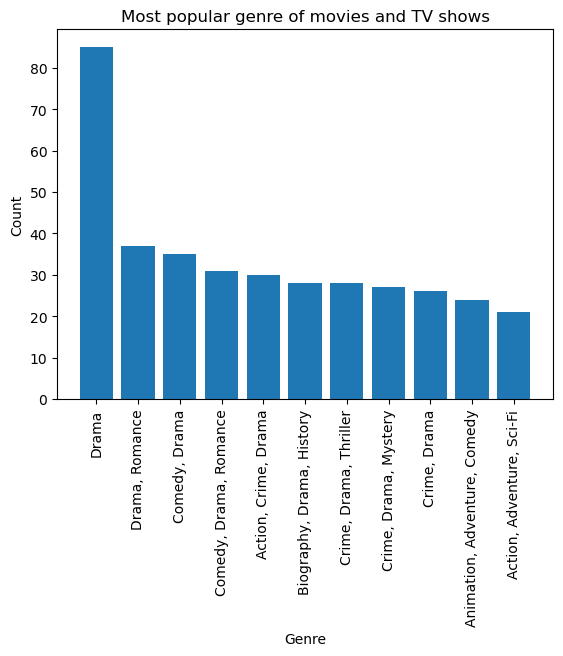

In [9]:
courses = list(count_move_for_each_genre.Genre[:11])
values = list(count_move_for_each_genre.Count[:11])
plt.bar(courses, values,
        width = 0.8)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Most popular genre of movies and TV shows")
plt.show()

In [10]:
director_counts = df['Director'].value_counts().reset_index()
director_counts.columns = ['Director', 'Count']
director_counts = director_counts.sort_values(by='Count', ascending=False)
director_counts.head(10)


,Director,Count
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10
5,Stanley Kubrick,9
6,Billy Wilder,9
7,Woody Allen,9
8,Christopher Nolan,8
9,Quentin Tarantino,8


In [11]:
top_director = director_counts.iloc[0]['Director']
print(" Director with the most top-rated movies/TV shows :")
top_director

 Director with the most top-rated movies/TV shows :


'Alfred Hitchcock'

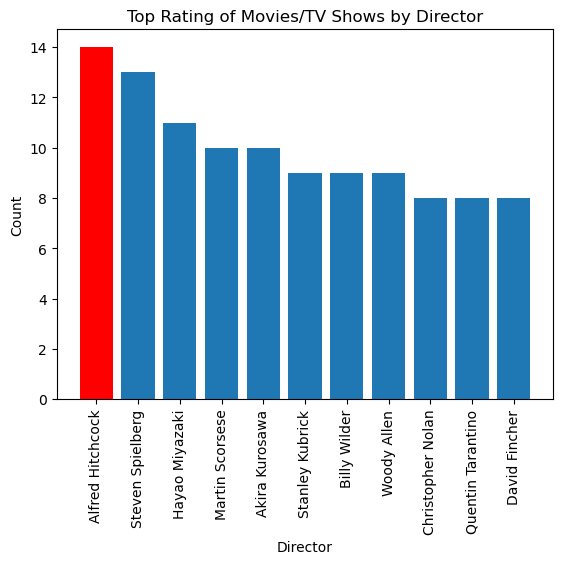

In [12]:
plt.bar(director_counts['Director'][:11], director_counts['Count'][:11])
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top Rating of Movies/TV Shows by Director')

# Highlight the top director with a different color
top_index = director_counts['Director'].tolist().index(top_director)
plt.bar(top_index, director_counts.iloc[top_index]['Count'], color='red')

plt.xticks(rotation=90)  # Rotate x-axis labels for readability

plt.show()

#  **Analysis Report: IMDB Dataset of Top 1000 Movies and TV Shows**

**Data Preprocessing**


Before analyzing the data, we performed some data preprocessing steps, including removing unnecessary columns and handling missing values. The columns we focused on for analysis were: 'Series_Title', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'No_of_Votes' and 'Gross'.

**Insights and Observations**

* The most popular genre among the top 1000 movies and TV shows in the dataset is Drama, indicating a strong preference for dramatic content.
* Alfred Hitchcoc emerged as the director with the most top-rated movies/TV shows, showcasing his impact and success in the industry.
* It would be interesting to further analyze the relationship between the director and IMDb ratings to understand the influence of different directors on the overall ratings of movies/TV shows.

**Conclusion**

This analysis provided insights into the popular genre and top-rated directors in the IMDB dataset of the top 1000 movies and TV shows. Understanding the preferences and contributions of directors can help in evaluating the quality and success of movies/TV shows. Further analysis can be done to explore other aspects of the dataset and gain deeper insights.